# Шаг1: Импорт библиотек

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, mean_squared_error
from sklearn.metrics import mean_squared_error as rmse  
from sklearn.preprocessing import StandardScaler

# Шаг2: Чтение файла и импорт данных

In [160]:
data = pd.read_csv('/workspaces/spbu-python-course/project/titanik#9/titanic.csv') 
print("Данные после загрузки:")
print(data.head())
print(data.info()) 

Данные после загрузки:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0

# Шаг3: DataCleaning

In [161]:
print("Количество пропусков в каждом столбце:")
print(data.isnull().sum())
data = data.dropna() 
print("Данные после удаления строк с пропусками:")
print(data.head())
print(data.info())

Количество пропусков в каждом столбце:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Данные после удаления строк с пропусками:
    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58

# Шаг4: EDA. График выживших. Гистограмма возраста пассажиров. График оотношение выживаемости по полу

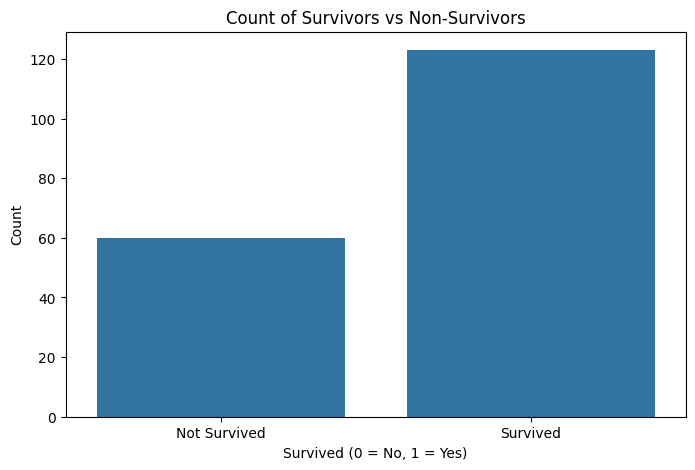

In [162]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=data)
plt.title('Count of Survivors vs Non-Survivors')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.show()

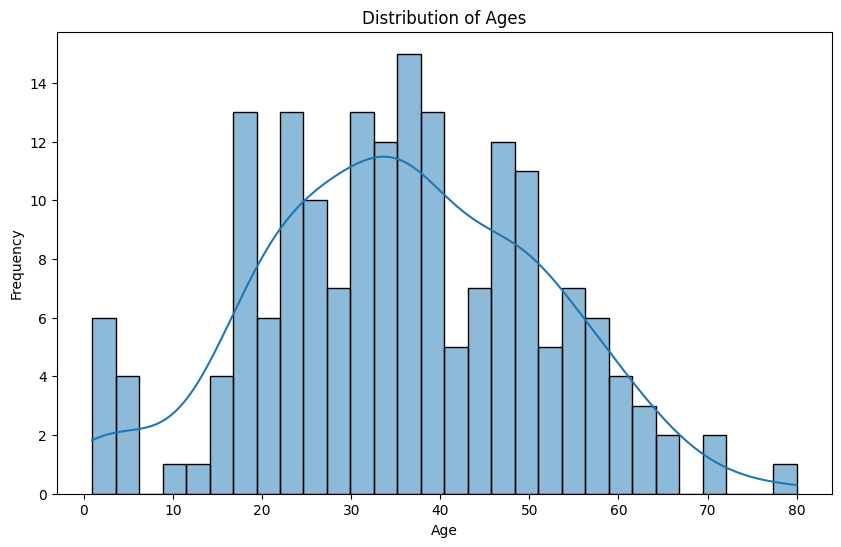

In [163]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

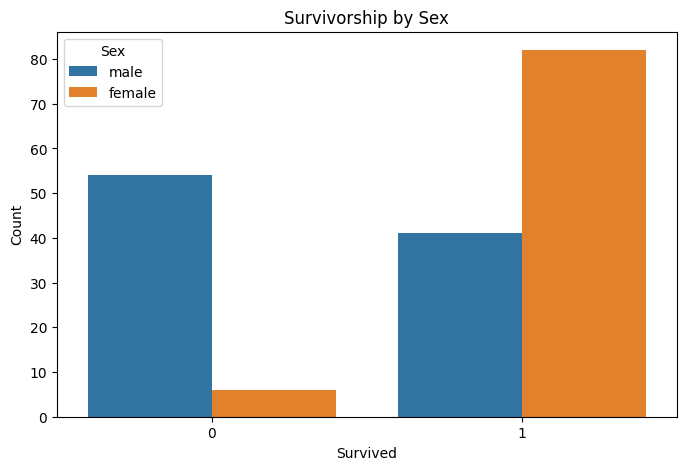

In [164]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survivorship by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

## Выводы по графикам 

1: Количество выживших и невыживших
На первом графике показано распределение пассажиров по статусу выживания. Мы видим, что большинство пассажиров не выжили. В то время как количество выживших пассажиров составляет около 38%, количество невыживших значительно выше.

2: Распределение возрастов
Второй график демонстрирует распределение возрастов пассажиров на Титанике. Мы видим, что распределение возрастов имеет два пика: первый пик находится в возрастной группе около 20-30 лет, а второй — в младшей возрастной группе (0-10 лет). 

3: Выживаемость по полу
Третий график представляет собой сравнительный анализ выживаемости среди мужчин и женщин. Мы видим, что женщины выживали намного чаще, чем мужчины. 

# Шаг5: Преобразование категориальных признаков в числовые. Обучение модели

In [165]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)  
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
print("Данные после преобразования категориальных признаков в числовые:")
print(data.head())
print(data.info())

Данные после преобразования категориальных признаков в числовые:
    PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
1             2         1       1  38.0      1      0  71.2833     False   
3             4         1       1  35.0      1      0  53.1000     False   
6             7         0       1  54.0      0      0  51.8625      True   
10           11         1       3   4.0      1      1  16.7000     False   
11           12         1       1  58.0      0      0  26.5500     False   

    Embarked_Q  Embarked_S  
1        False       False  
3        False        True  
6        False        True  
10       False        True  
11       False        True  
<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    in

Разделение данных на обучающую и тестовую выборки

In [166]:
x = data.drop('Survived', axis=1) 
y = data['Survived']  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Обучение модели  RandomForestClassifier

In [167]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
print("Признаки после масштабирования (первый элемент):")
print(x_scaled[0:5])




Признаки после масштабирования (первый элемент):
[[-1.84013507 -0.37225618  0.14906507  0.83362754 -0.63172982 -0.0971798
  -1.03901177 -0.10511767 -1.31580518]
 [-1.83201742 -0.37225618 -0.0432295   0.83362754 -0.63172982 -0.3359971
  -1.03901177 -0.10511767  0.75999093]
 [-1.81984093 -0.37225618  1.17463611 -0.7230443  -0.63172982 -0.35225028
   0.96245301 -0.10511767  0.75999093]
 [-1.80360562  3.52047984 -2.03027338  0.83362754  0.69708118 -0.81407038
  -1.03901177 -0.10511767  0.75999093]
 [-1.79954679 -0.37225618  1.43102886 -0.7230443  -0.63172982 -0.68470165
  -1.03901177 -0.10511767  0.75999093]]


In [168]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'RandomForest - Precision: {precision_rf:.2f}, Recall: {recall_rf:.2f}, Accuracy: {accuracy_rf:.2f}')

RandomForest - Precision: 0.73, Recall: 0.83, Accuracy: 0.70


Обучение DecisionTreeClassifier

In [169]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)  # F1 Score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'DecisionTree - Precision: {precision_dt:.2f}, Recall: {recall_dt:.2f}, F1 Score: {f1_dt:.2f}, Accuracy: {accuracy_dt:.2f}')

DecisionTree - Precision: 0.78, Recall: 0.78, F1 Score: 0.78, Accuracy: 0.73


Обучение LogisticRegression

In [170]:
log_model = LogisticRegression(max_iter=1000, solver='liblinear')  # Используем 'liblinear' да и увеличиваем количество итераций
log_model.fit(x_train, y_train)
y_pred_log = log_model.predict(x_test)

precision_log = precision_score(y_test, y_pred_log, pos_label=0)  # Для погибших
recall_log = recall_score(y_test, y_pred_log, pos_label=0)  # Для погибших
print(f'LogisticRegression - Precision (Dead): {precision_log:.2f}, Recall (Dead): {recall_log:.2f}')

LogisticRegression - Precision (Dead): 0.60, Recall (Dead): 0.64


Регрессия возраста

In [171]:
x_reg = data.drop('Age', axis=1)  
y_reg = data['Age'] 

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)
reg_model = LinearRegression()
reg_model.fit(x_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(x_test_reg)

In [172]:
rmse_value = rmse(y_test_reg, y_pred_reg)  
print(f'Root Mean Squared Error for Age: {rmse_value:.2f}')  

Root Mean Squared Error for Age: 176.22


In [173]:
results = pd.DataFrame({
    'Model': ['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression', 'LinearRegression'],
    'Precision (Survived)': [precision_dt, None, None, None],
    'Recall (Survived)': [recall_dt, None, None, None],
    'F1 Score (Survived)': [f1_dt, None, None, None],
    'Accuracy': [None, accuracy_rf, None, None],
    'Precision (Dead)': [None, None, precision_log, None],
    'Recall (Dead)': [None, None, recall_log, None],
    'RMSE (Age)': [None, None, None, rmse_value]
})

In [174]:
your_results = pd.DataFrame({
    'Model': ['Your Results'],
    'Precision (Survived)': [0.79],
    'Recall (Survived)': [0.72],
    'F1 Score (Survived)': [0.75],
    'Accuracy': [0.8],
    'Precision (Dead)': [0.81],
    'Recall (Dead)': [0.88],
    'RMSE (Age)': [10.7],
})

In [175]:
results = pd.concat([results, your_results], ignore_index=True)
print(results)

                    Model  Precision (Survived)  Recall (Survived)  \
0  DecisionTreeClassifier              0.782609           0.782609   
1  RandomForestClassifier                   NaN                NaN   
2      LogisticRegression                   NaN                NaN   
3        LinearRegression                   NaN                NaN   
4            Your Results              0.790000           0.720000   

   F1 Score (Survived)  Accuracy  Precision (Dead)  Recall (Dead)  RMSE (Age)  
0             0.782609       NaN               NaN            NaN         NaN  
1                  NaN  0.702703               NaN            NaN         NaN  
2                  NaN       NaN              0.60       0.642857         NaN  
3                  NaN       NaN               NaN            NaN  176.219119  
4             0.750000  0.800000              0.81       0.880000   10.700000  


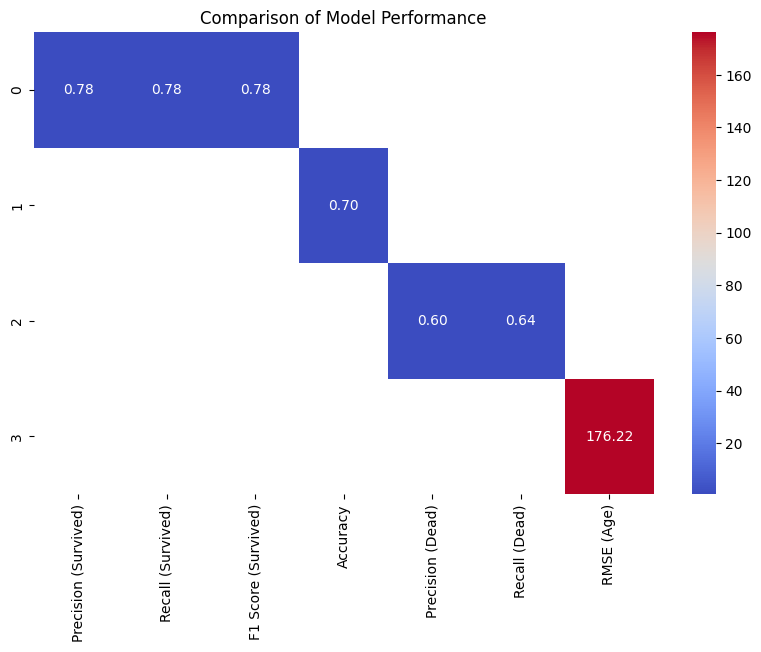

In [176]:
plt.figure(figsize=(10, 6))
sns.heatmap(results.iloc[:-1, 1:].astype(float), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Comparison of Model Performance')
plt.show()

# ВЫВОД

Precision для выживших:
Моя модель с показателем 0.79 превосходит Precision DecisionTreeClassifier (0.78). Это указывает на то, что моя модель лучше справляется с классификацией выживших на основе выбранных признаков.

Recall для выживших:
Значение Recall равное 0.72 у моей модели немного ниже, чем у DecisionTreeClassifier (0.78). Это означает, что моя модель и имеет высокую точность, она может пропускать некоторых выживших.

F1 Score для выживших:
F1 Score у моей модели составляет 0.75, что является сопоставимым результатом с DecisionTreeClassifier (0.78). F1 Score — это среднее Precision и Recall, поэтому мой результат хороший, но немного ниже.

Accuracy:
Моя модель обладает точностью 0.80. Значение точности RandomForestClassifier составляет 0.70, это значит, что моя модлеь более точная.

Precision для погибших:
Моя модель показала Precision для погибших в 0.81, что значительно выше, чем у LogisticRegression (0.60).Это указывает на то, что моя модель лучше справляется с классификацией погибших.

Recall для погибших:
Recall для погибших у моей модели = 0.88, что также лучше, чем у LogisticRegression (0.64). Это означает, что моя модель лучше находит погибших пассажиров.

RMSE для возраста:
RMSE для моей модели составляет 10.70.
